In [ ]:
作業: 取得另一個 dataset: titanic,

(1) 做條形圖

(2) 利用 facet grid 繪圖並分析

(3) 繪製小提琴圖

In [121]:
df = sns.load_dataset("titanic")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [135]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [210]:
df1 = df[["sex","class","survived"]]

In [203]:
df2 = df1.groupby(["sex","class"]).mean()

In [213]:
dfseries = df2.unstack().unstack()

In [214]:
import pandas as pd

In [216]:
pd1 = pd.DataFrame(dfseries)

In [224]:
pd1.rename(columns={"0":"survived"})

0
         class  sex             
survived First  female  0.968085
                male    0.368852
         Second female  0.921053
                male    0.157407
         Third  female  0.500000
                male    0.135447

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"

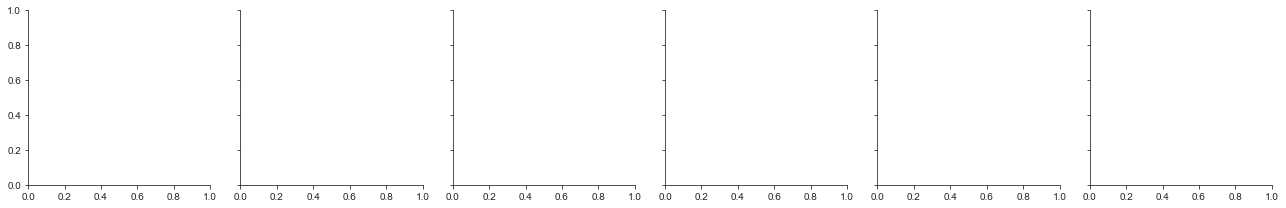

In [208]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df2, col="survived")
g.map(plt.hist, "sex")

In [193]:
df2["female"]["First"]

survived    0.968085
dtype: float64

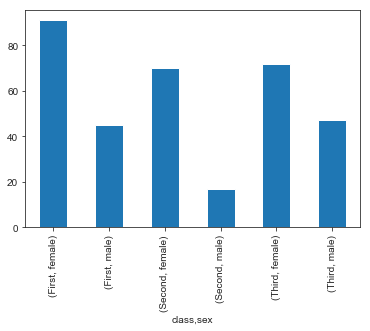

In [226]:
#先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
#其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。

df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['class','sex']).survived.sum()
survived.plot(kind='bar')

In [227]:
#使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
#繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

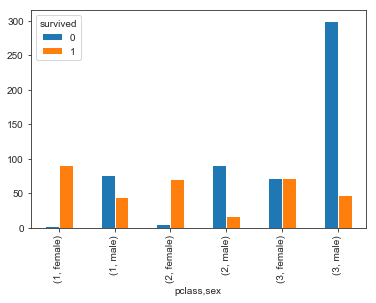

In [239]:
survived_counts.plot(kind="bar")

'\n在這邊coding\nsns.violinplot\n'

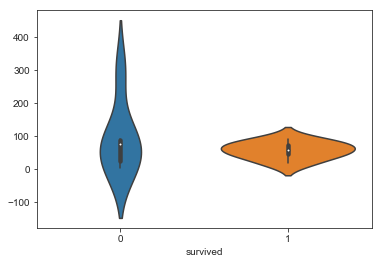

In [240]:
# 直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。
sns.violinplot(data=survived_counts)
sns.
'''
在這邊coding
sns.violinplot
'''

In [241]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df, col=)

h = sns.FacetGrid(df, col=)
'''
在這邊coding
g = sns.FacetGrid
g.map
h = sns.FacetGrid
h.map
'''
# PS: 跟第一次做 Face.Grid 有何不同??

'\n在這邊coding\ng = sns.FacetGrid\ng.map\nh = sns.FacetGrid\nh.map\n'

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得鳶尾花資料集
df = sns.load_dataset('iris')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


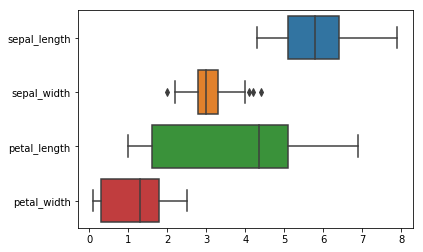

In [6]:
# 直接使用PANDAS dataframe, 當作參數
# 箱形圖顯示了數據的總體分布，同時繪製了異常值的數據點。這個物理點讓它們的特定值在樣本之間容易被識別和比較。
# 數據中的任何異常值都繪製為單個點。

sns.boxplot(data = df, orient = "h")
plt.show()

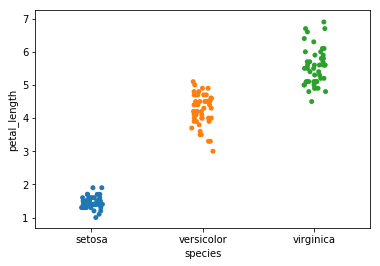

In [7]:
# 當一個或兩個正在研究的變數是分類的時,我們使用像條帶線()、swarmplot()等的圖。
# 查看到每個物種petal_length的差異。但是,散點圖的主要問題是散點圖上的點重疊
sns.stripplot(x = "species", y = "petal_length", data = df)
plt.show()

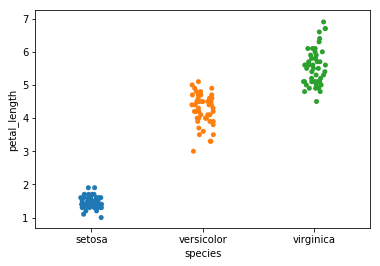

In [8]:
# 上述散點圖的主要問題是散點圖上的點重疊。我們使用"抖動"參數來處理此類方案。
# 抖動會為數據添加一些隨機雜訊。此參數將沿分類軸調整位置。
sns.stripplot(x = "species", y = "petal_length", data = df, jitter=True)
plt.show()

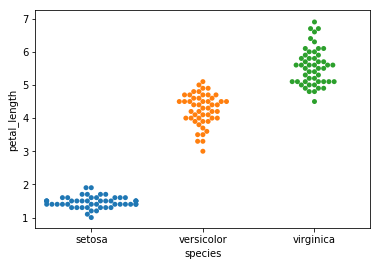

In [9]:
#另一個可以用作「抖動」 的替代選項是函數群圖()。
#此函數將散點圖的每個點都放在分類軸上,從而避免重疊點 
sns.swarmplot(x = "species", y = "petal_length", data = df)
plt.show()

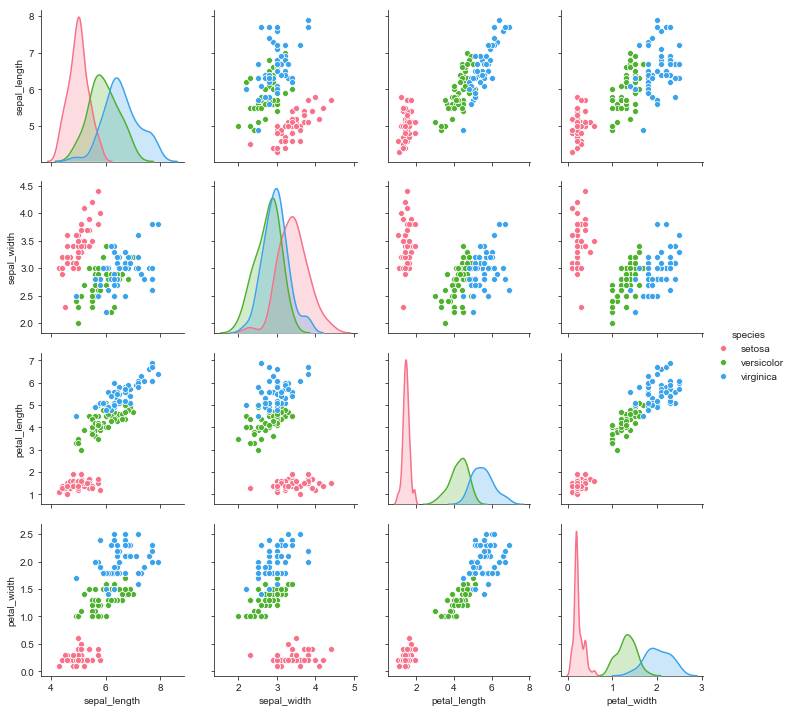

In [10]:
# 可以觀察每個情節的變化。繪圖採用矩陣格式,其中行名表示 x 軸,列名稱表示 y 軸。
# 對角線圖是內核密度圖,其中其他圖是散點圖
# 就是hue在sns.pairplot函數調用中使用關鍵字：

sns.set_style("ticks") #STYLE初始化
sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

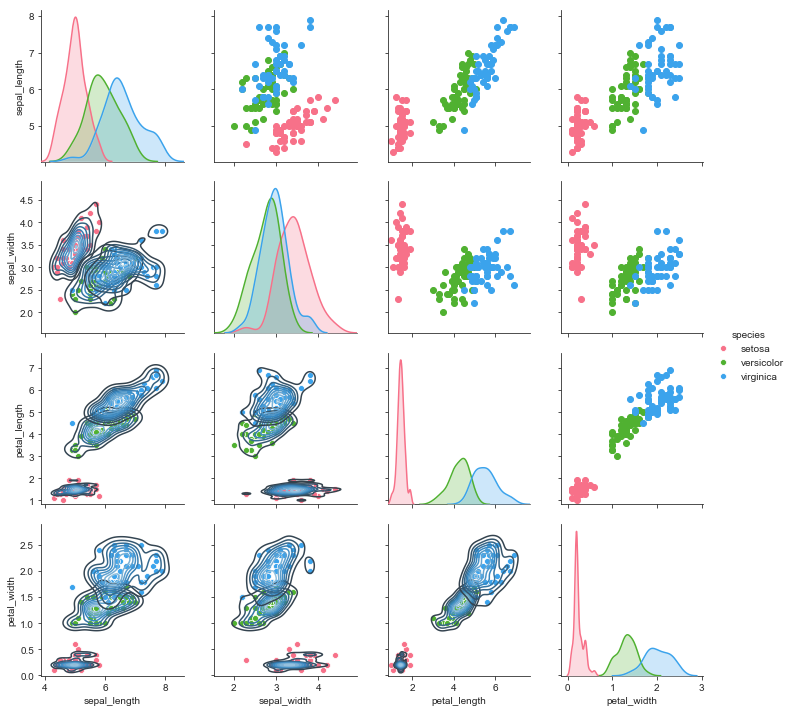

In [17]:
# 可以在上三角形和下三角形使用不同的函數來查看關係的不同方面
g = sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap = "Blues_d")
# g.map_diag(sns.kdeplot, lw = 3, legend = False);
plt.show()